In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
select_data=int(input("Enter 1 for seeds dataset and 0 for bank notes dataset: "))
if(select_data==1):
    data_path = 'seeds_dataset1.csv'
else:
    data_path ='data_banknote_authentication.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    # headers = next(reader)
    # get all the rows as a list
    data = list(reader)
    # transform data into numpy array
    data = np.array(data).astype(float)

Enter 1 for seeds dataset and 0 for bank notes dataset: 1


In [3]:
np.random.shuffle(data)
targets=data[:,data.shape[1]-1]
data=np.delete(data,data.shape[1]-1,1)
#print(data.shape)
#print(data)
#print()
#print(targets.shape)
#print(targets)

In [4]:
def GaussianNaiveBayes(X_train,X_test,X_train_targets,X_test_targets,fold,adder):
    # partition data according to targets
    uniq=np.unique(X_train[:,X_train.shape[1]-1])
    no_of_classes=uniq.shape[0]
    print("classes:",no_of_classes)
    classprobs=np.zeros(no_of_classes)
    probarray=np.zeros((X_test_targets.shape[0],no_of_classes))
    truth_array=np.zeros(X_test_targets.shape[0])
    for z in range(no_of_classes):
        X1 = X_train[X_train[:, X_train.shape[1]-1] == z+adder, :]
        #X2 = X_train[X_train[:, X_train.shape[1]-1] == 2, :]
        #X3 = X_train[X_train[:, X_train.shape[1]-1] == 3, :]

        totalpts=X_train.shape[0]
        p1=X1.shape[0]/totalpts   # P(1)
        classprobs[z]=p1
        #p2=X2.shape[0]/totalpts   # P(2)
        #p3=X3.shape[0]/totalpts   # P(3)
        #print("Totalpts:",totalpts,'\n')
        #print("p1=",p1,"p2=",p2,"p3=",p3,'\n')

        #mean of every class in each feature
        meanfn_class1=np.mean(X1, axis=0)
       # meanfn_class2=np.mean(X2, axis=0)
       # meanfn_class3=np.mean(X3, axis=0)
        #print("mean_class1=",meanfn_class1)
        #print("mean_class2=",meanfn_class2)
        #print("mean_class3=",meanfn_class3,'\n')

        #variance of every class in each feature
        varfn_class1=np.var(X1, axis = 0)
        #varfn_class2=np.var(X2, axis = 0)
        #varfn_class3=np.var(X3, axis = 0)
        #print("var_class1=",varfn_class1)
        #print("var_class2=",varfn_class2)
        #print("var_class3=",varfn_class3,'\n')

        # P(F_dptn|1) 
        j=0
        while(j<X_test_targets.shape[0]):
            #p_p1=p_p2=p_p3=1
            p_p0=1
            for i in range(X_train.shape[1]-1):
                p_p0=p_p0*math.exp((-1/2)*((X_test[j,i]-meanfn_class1[i])**2)/varfn_class1[i])/(math.sqrt(2*math.pi*varfn_class1[i]))
                #p_p2=p_p2*math.exp((-1/2)*((X_test[j,i]-meanfn_class2[i])**2)/varfn_class2[i])/(math.sqrt(2*math.pi*varfn_class2[i]))
                #p_p3=p_p3*math.exp((-1/2)*((X_test[j,i]-meanfn_class3[i])**2)/varfn_class3[i])/(math.sqrt(2*math.pi*varfn_class3[i]))
                #probarray[z]=p_p0[z]
                #probarray[1]=p_p2
                #probarray[2]=p_p3
            probarray[j,z]=p_p0*classprobs[z]
            #index=np.where(probarray == np.amax(probarray))
            #if(index[0]+1.0==X_test_targets[j]):
                #print("Targets successfully matched!")
                #truth_array[j]=1
            #else:
                #truth_array[j]=0
                #print("Targets not matched!")
                #combinedprob=(p_p1*p1)+(p_p2*p2)+(p_p3*p3)
                #print("dataptn:",X_test[j,:])
                #print("Prob of dataptn given class 1:",(p_p1*p1)/(combinedprob))
                #print("Prob of dataptn given class 2:",(p_p2*p2)/(combinedprob))
                #print("Prob of dataptn given class 3:",(p_p3*p3)/(combinedprob))
            #print("Real target value=",X_test_targets[j],'\n')
            j+=1
    #print(classprobs)
   # for n in range(X_test_targets.shape[0]):
    #    for m in range(no_of_classes):
     #       probarray[n,m]=probarray[n,m]/probarray[m,:].sum()
    #print(probarray)
    for l in range(X_test_targets.shape[0]):
        index=np.where(probarray[l,:] == np.amax(probarray[l,:]))
        if(index[0]+adder==X_test_targets[l]):
            #print("Targets successfully matched!")
            truth_array[l]=1
        else:
            truth_array[l]=0
            #print("Targets not matched!")
            #combinedprob=(p_p1*p1)+(p_p2*p2)+(p_p3*p3)
            #print("dataptn:",X_test[j,:])
            #print("Prob of dataptn given class 1:",(p_p1*p1)/(combinedprob))
            #print("Prob of dataptn given class 2:",(p_p2*p2)/(combinedprob))
            #print("Prob of dataptn given class 3:",(p_p3*p
    print("For fold:",fold)
    #print("TRUTH ARRAY:",truth_array)
    accuracy=(np.count_nonzero(truth_array)/truth_array.shape[0])*100
    print("Accuracy is:",accuracy,'\n')
    return accuracy
        #print(X1.shape)
        #print("X1\n",X1)
        #print(X2.shape)
        #print("X2\n",X2)
        #print(X3.shape)
        #print("X3\n",X3)

In [5]:
k=5
kf = KFold(n_splits=k,shuffle=True)
kf.get_n_splits(data)
print(kf)
fold=0
accuracy_array=np.zeros(k)
for train_index, test_index in kf.split(data):
   # print("TRAIN:", train_index, "\nTEST:", test_index,'\n')
    X_train, X_test = data[train_index,:], data[test_index,:]
    Y_train, Y_test = targets[train_index], targets[test_index]
    
    #joining targets of train set to train data as column
    Y_train=Y_train.reshape((-1, 1))
    X_train=np.append(X_train, Y_train, axis=1)
    Y_train=Y_train.reshape((1, -1))
    ##############
    #############
    #sorting according to target value
    #X_train = X_train[X_train[:,X_train.shape[1]-1].argsort(kind='mergesort')]
    
    #print("TRAIN:", X_train.shape, "\nTEST:", X_test.shape,'\n')
    #print("TRAIN:", X_train, "\nTEST:", X_test,'\n')
    #print("TRAIN TARGETS:", Y_train, "\nTEST TARGETS:", Y_test,'\n')
    #if(X_train.shape[1]>5):
     #   adder=1
    #else:
    #    adder=0
    if((np.flatnonzero(Y_test == 0)).shape[0]>0):
        adder=0
    else:
        adder=1
    accuracy=GaussianNaiveBayes(X_train,X_test,Y_train,Y_test,fold,adder)
    accuracy_array[fold]=accuracy
    fold+=1
    #break

KFold(n_splits=5, random_state=None, shuffle=True)
classes: 3
For fold: 0
Accuracy is: 92.85714285714286 

classes: 3
For fold: 1
Accuracy is: 92.85714285714286 

classes: 3
For fold: 2
Accuracy is: 88.09523809523809 

classes: 3
For fold: 3
Accuracy is: 90.47619047619048 

classes: 3
For fold: 4
Accuracy is: 85.71428571428571 



SEEDS DATASET:

[92.85714286 92.85714286 88.0952381  90.47619048 85.71428571]
Mean accuracy is: 90.0
Standard Deviation of accuracy is: 2.7766437594501476


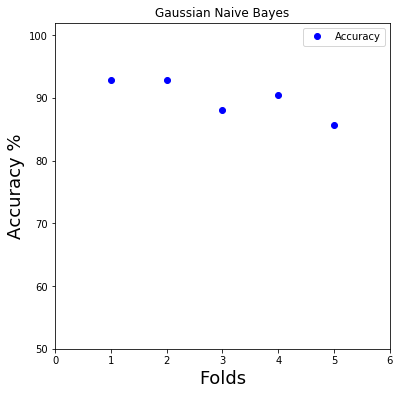

In [6]:
fold_values=np.zeros(k)
for i in range(k):
    fold_values[i]=i+1
if(select_data==1):
    print("SEEDS DATASET:\n")
else:
    print("BANK NOTES DATASET:\n")
print(accuracy_array)
mea=np.mean(accuracy_array)
print("Mean accuracy is:",mea)
print("Standard Deviation of accuracy is:",np.std(accuracy_array))
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Gaussian Naive Bayes')
ax.plot(fold_values,accuracy_array,'bo', label='Accuracy')
plt.xlabel('Folds', fontsize=18)
plt.ylabel('Accuracy %', fontsize=18)
plt.axis([0, 6, 50, 102])
ax.legend()
plt.show()